In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from source.plot_scripts import weight_data_74t

# Cleane

In [6]:
datasets, _ = weight_data_74t.get_datasets()

def clean_weights_by_iqr(datasets, iqr_multiplier=1.5):
    cleaned_datasets = []
    
    for tonnage, weights, label, color in datasets:
        # Calculate IQR
        Q1 = np.percentile(weights, 25)
        Q3 = np.percentile(weights, 75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR
        
        # Filter weights
        cleaned_weights = weights[(weights >= lower_bound) & (weights <= upper_bound)]
        
        # Add cleaned dataset
        cleaned_datasets.append((tonnage, cleaned_weights, label, color))
    
    return cleaned_datasets

# Clean the datasets
datasets = clean_weights_by_iqr(datasets)

# Boxplot totalvekter

/tmp/ipykernel_44654/3282542816.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplots = ax.boxplot(boxplot_data, patch_artist=True, labels=labels, medianprops={'color': 'black', 'linewidth': 2})


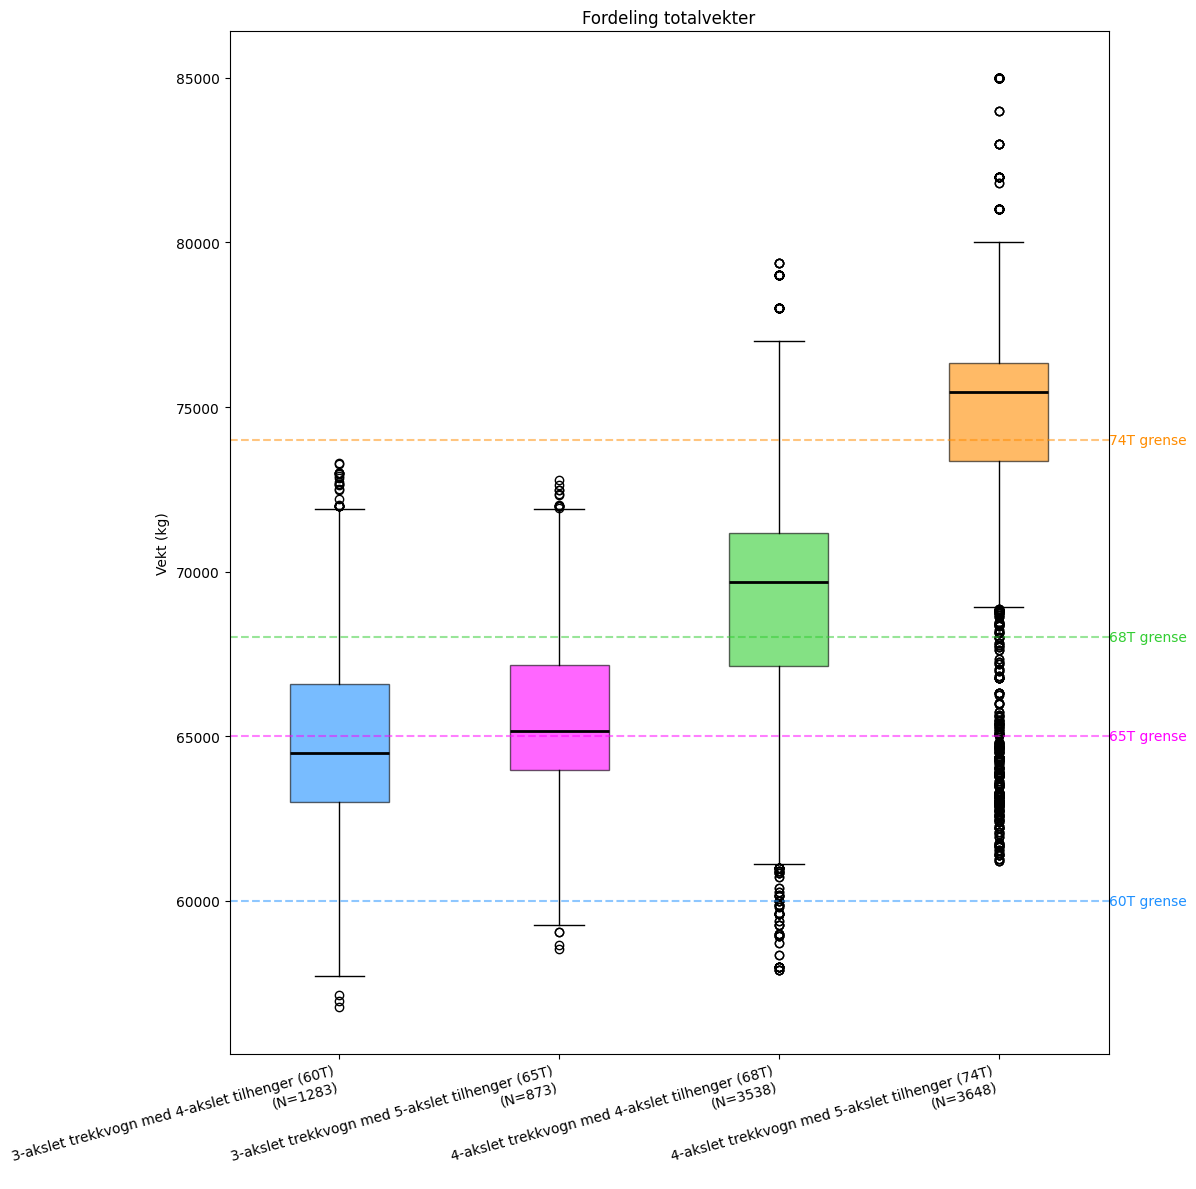

In [7]:
fig, ax = plt.subplots(figsize=(12, 12)) 

boxplot_data = [weight_data for _, weight_data, _, _ in datasets]
labels = [f"{label}\n(N={len(weight_data)})" for _, weight_data, label, _ in datasets]

boxplots = ax.boxplot(boxplot_data, patch_artist=True, labels=labels, medianprops={'color': 'black', 'linewidth': 2})

for patch, (_, _, _, color) in zip(boxplots['boxes'], datasets):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax.set_ylabel('Vekt (kg)')
ax.set_title('Fordeling totalvekter')
plt.xticks(rotation=15, ha='right')

for i, (weight_limit, _, _, color) in enumerate(datasets):
    weight_limit_kg = weight_limit * 1000
    ax.axhline(y=weight_limit_kg, color=color, linestyle='--', alpha=0.5)
    ax.text(len(datasets)+0.5, weight_limit_kg, f"{weight_limit}T grense", 
            color=color, va='center')

plt.tight_layout()
plt.show()

# Histogrammer totalvekter

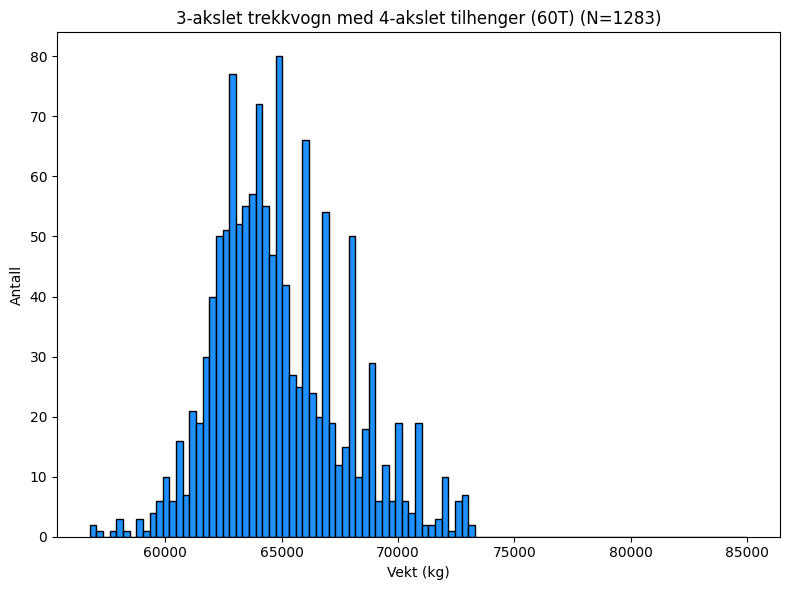

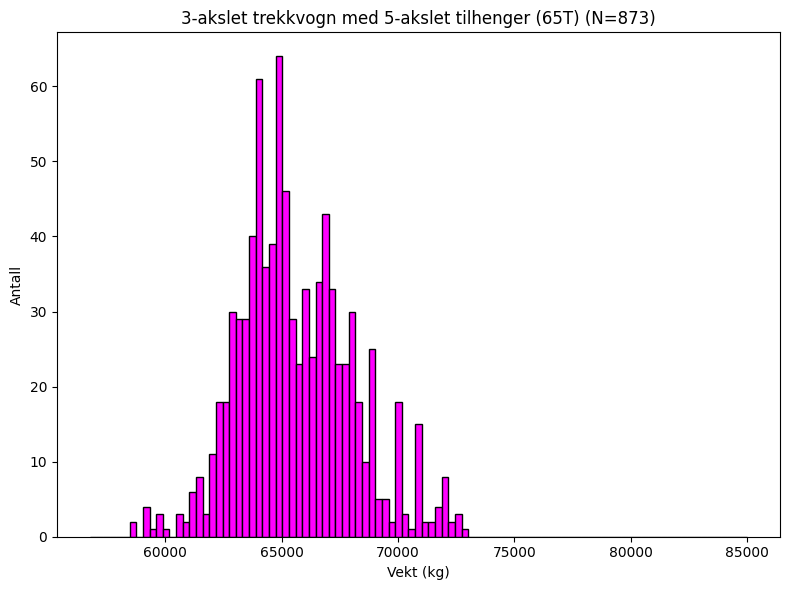

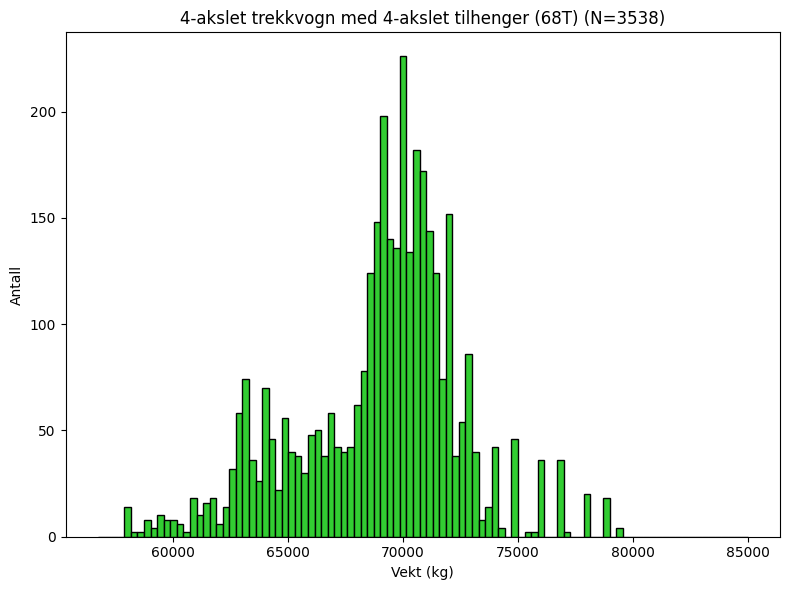

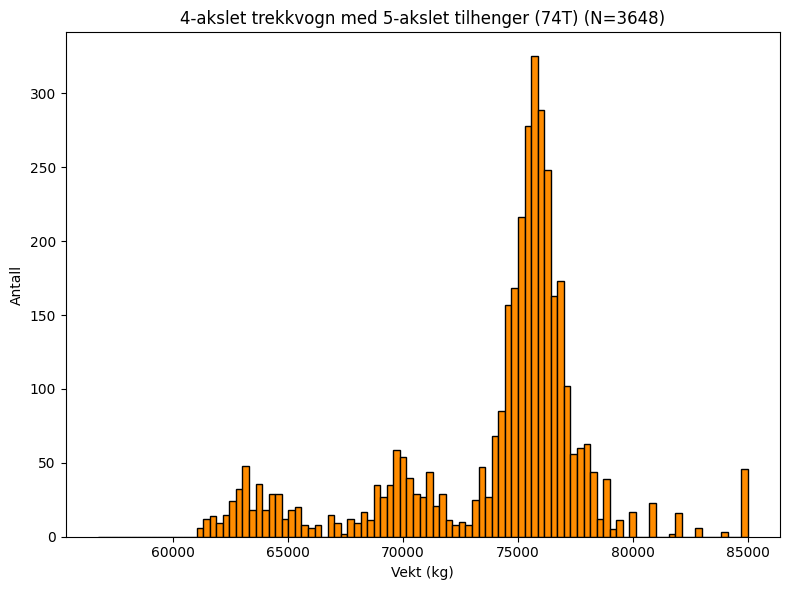

In [8]:
# Get overall min and max for consistent x-axis
all_weights = [weight_data for _, weight_data, _, _ in datasets]
global_min = min([w.min() for w in all_weights])
global_max = max([w.max() for w in all_weights])
bins = np.linspace(global_min, global_max, 100)

# Create separate histograms
for weight_limit, weight_data, label, color in datasets:
    weight_data_74t.plot_histogram(
        data=weight_data,
        bins=bins,
        color=color,
        edgecolor='black',
        title=f"{label} (N={len(weight_data)})",
        xlabel='Vekt (kg)', 
        ylabel='Antall',
        plot=True,
        save=False,
        save_dir=None
    )